## Import Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import  RFE
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X_top = pd.read_csv('../datasets/X_top.csv',index_col='Id') 

In [3]:
y =pd.read_csv('../datasets/y.csv',index_col='Id')

In [4]:
X_top

,Lot Area,Lot Shape,Overall Qual,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,Total Bsmt SF,Heating QC,...,house age,reno newness,MS SubClass_SC60,MS Zoning_RM,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Year Built_2008,Roof Style_Gable,Roof Style_Hip
Id,,,,,,,,,,,,,,,,,,,,,
109,13517,3,6,289.0,4,3,0,533.0,725.0,5,...,34,5,1,0,0,0,0,0,1,0
544,11492,3,7,132.0,4,4,0,637.0,913.0,5,...,13,12,1,0,0,0,0,0,1,0
153,7922,4,5,0.0,3,3,0,731.0,1057.0,3,...,57,3,0,0,0,0,0,0,1,0
318,9802,4,5,0.0,3,4,0,0.0,384.0,4,...,4,3,1,0,0,0,0,0,1,0
255,14235,3,6,0.0,3,2,0,0.0,676.0,3,...,110,17,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,11449,3,8,0.0,4,4,2,1011.0,1884.0,5,...,1,1,0,0,0,0,0,0,1,0
785,12342,3,4,0.0,3,3,0,262.0,861.0,5,...,69,59,0,0,0,0,0,0,1,0
916,7558,4,6,0.0,3,3,0,0.0,896.0,4,...,81,59,0,0,0,0,0,0,1,0


In [5]:
y =y["SalePrice"]

In [6]:
X_top_train, X_top_test, y_top_train, y_top_test = train_test_split(X_top,y,test_size = 0.2, random_state=42)

In [7]:
ss = StandardScaler()
ss.fit(X_top_train)

X_top_train_ss = ss.transform(X_top_train)
X_top_test_ss = ss.transform(X_top_test)

## Baseline Model Linear Regression :  Pipeline, Tuning and Evaluation

In [8]:
# Instantiate pipeline object.
pipe_lr = Pipeline([('ss', StandardScaler()), ('lr', LinearRegression())]) 


In [9]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [10]:
# Define dictionary of hyperparameters.
pipe_lr_params = { 'ss__with_mean': [True, False], 
                'ss__with_std': [True, False],

                'lr__normalize': [True, False],
               }



In [11]:
# Instantiate our GridSearchCV object.
gs_lr = GridSearchCV(pipe_lr, # What is the model we want to fit?
                               pipe_lr_params, # What is the dictionary of hyperparameters?
                                 cv = 10,# What number of folds in CV will we use?
                                verbose=1)


In [12]:
gs_lr.fit(X_top_train_ss, y_top_train);

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


In [13]:
gs_lr.score(X_top_train_ss, y_top_train)

0.891399210839669

In [14]:
gs_lr.score(X_top_test_ss, y_top_test)

0.8850098984373096

In [15]:
print('RMSE:', np.sqrt(mean_squared_error(y_top_test, gs_lr.predict(X_top_test_ss))))

RMSE: 26189.975756482414


The baseline model seems to be a good model to predict on unknown data as its rsquare is close to 1. However, its root mean square error (RMSE) seems high. The RMSE needs to be compared with other models to determine whether it is too high.

In [16]:
columns = X_top.columns
coefficients =pd.DataFrame(gs_lr.best_estimator_.named_steps['lr'].coef_.T, 
                     index = columns, 
                     columns=['coef'])

In [17]:
coefficient = coefficients.sort_values('coef', ascending=False)['coef']

In [18]:
labels = coefficient.sort_values(ascending=False).index

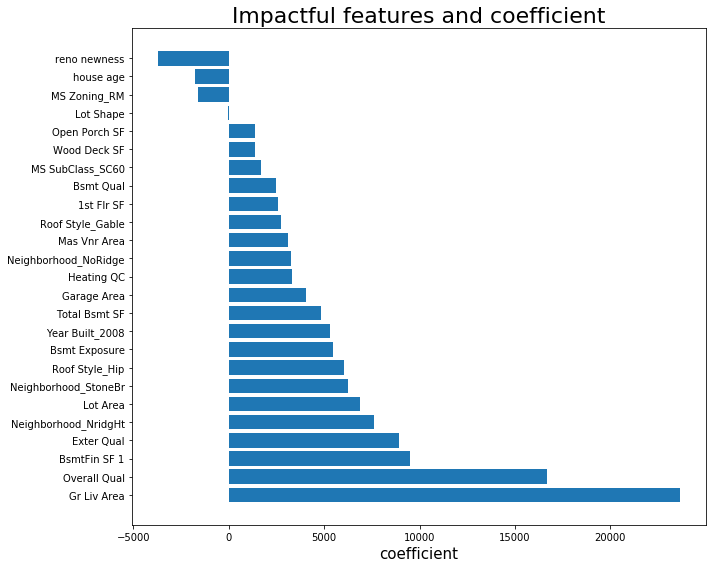

In [19]:
plt.figure(figsize=(10,8))
plt.barh(labels, coefficient.sort_values(ascending=False) )
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('coefficient', fontsize=15)
plt.title('Impactful features and coefficient', fontsize=22)
plt.tight_layout()


The coefficients for overall quality and ground living area are the 2 largest coefficients. However, they make intuitive sense that the size and quality of the house would have a large impact on sale price.